# <center> Similarity Based Learning: the k-Nearest Neighbor (kNN) Regression

## `Professor:` Matthew R. Maulion, MSc
## `Student:` Christian Jay Baguio

# Imports

In [1]:
import numpy as np
from numpy import array
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split as tts
import pylab as plot #plt.suptitle("nearest_neighbor_regression")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import mglearn #library provided by amueller
sns.set_theme(font='Times New Roman')

# Undersampled periodic signal
Consider   Cosine signal, what is the optimal n_neighbor to properly interpolate or extrapolate this time series.

Text(0, 0.5, 'Target')

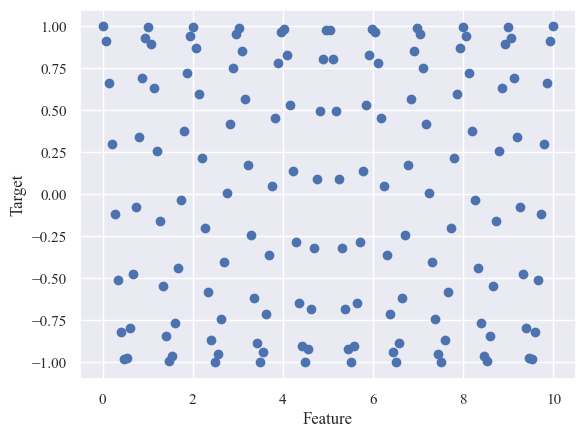

In [2]:
X = np.linspace(0.0, 10.0, 150) #Generate an N of array worth 150 and set spaces between 0.0 to 10
y = np.cos(2 * np.pi * X)

plt.plot(X, y, 'o')
plt.plot(X, -3 * np.ones(len(X)), 'o')
plt.ylim(-1.1, 1.1)
plt.xlabel("Feature")
plt.ylabel("Target")

In [3]:
#Reshape the X array
XX=np.reshape(X, (len(X),-1))

XX

array([[ 0.        ],
       [ 0.06711409],
       [ 0.13422819],
       [ 0.20134228],
       [ 0.26845638],
       [ 0.33557047],
       [ 0.40268456],
       [ 0.46979866],
       [ 0.53691275],
       [ 0.60402685],
       [ 0.67114094],
       [ 0.73825503],
       [ 0.80536913],
       [ 0.87248322],
       [ 0.93959732],
       [ 1.00671141],
       [ 1.0738255 ],
       [ 1.1409396 ],
       [ 1.20805369],
       [ 1.27516779],
       [ 1.34228188],
       [ 1.40939597],
       [ 1.47651007],
       [ 1.54362416],
       [ 1.61073826],
       [ 1.67785235],
       [ 1.74496644],
       [ 1.81208054],
       [ 1.87919463],
       [ 1.94630872],
       [ 2.01342282],
       [ 2.08053691],
       [ 2.14765101],
       [ 2.2147651 ],
       [ 2.28187919],
       [ 2.34899329],
       [ 2.41610738],
       [ 2.48322148],
       [ 2.55033557],
       [ 2.61744966],
       [ 2.68456376],
       [ 2.75167785],
       [ 2.81879195],
       [ 2.88590604],
       [ 2.95302013],
       [ 3

# Training and Testing the Data

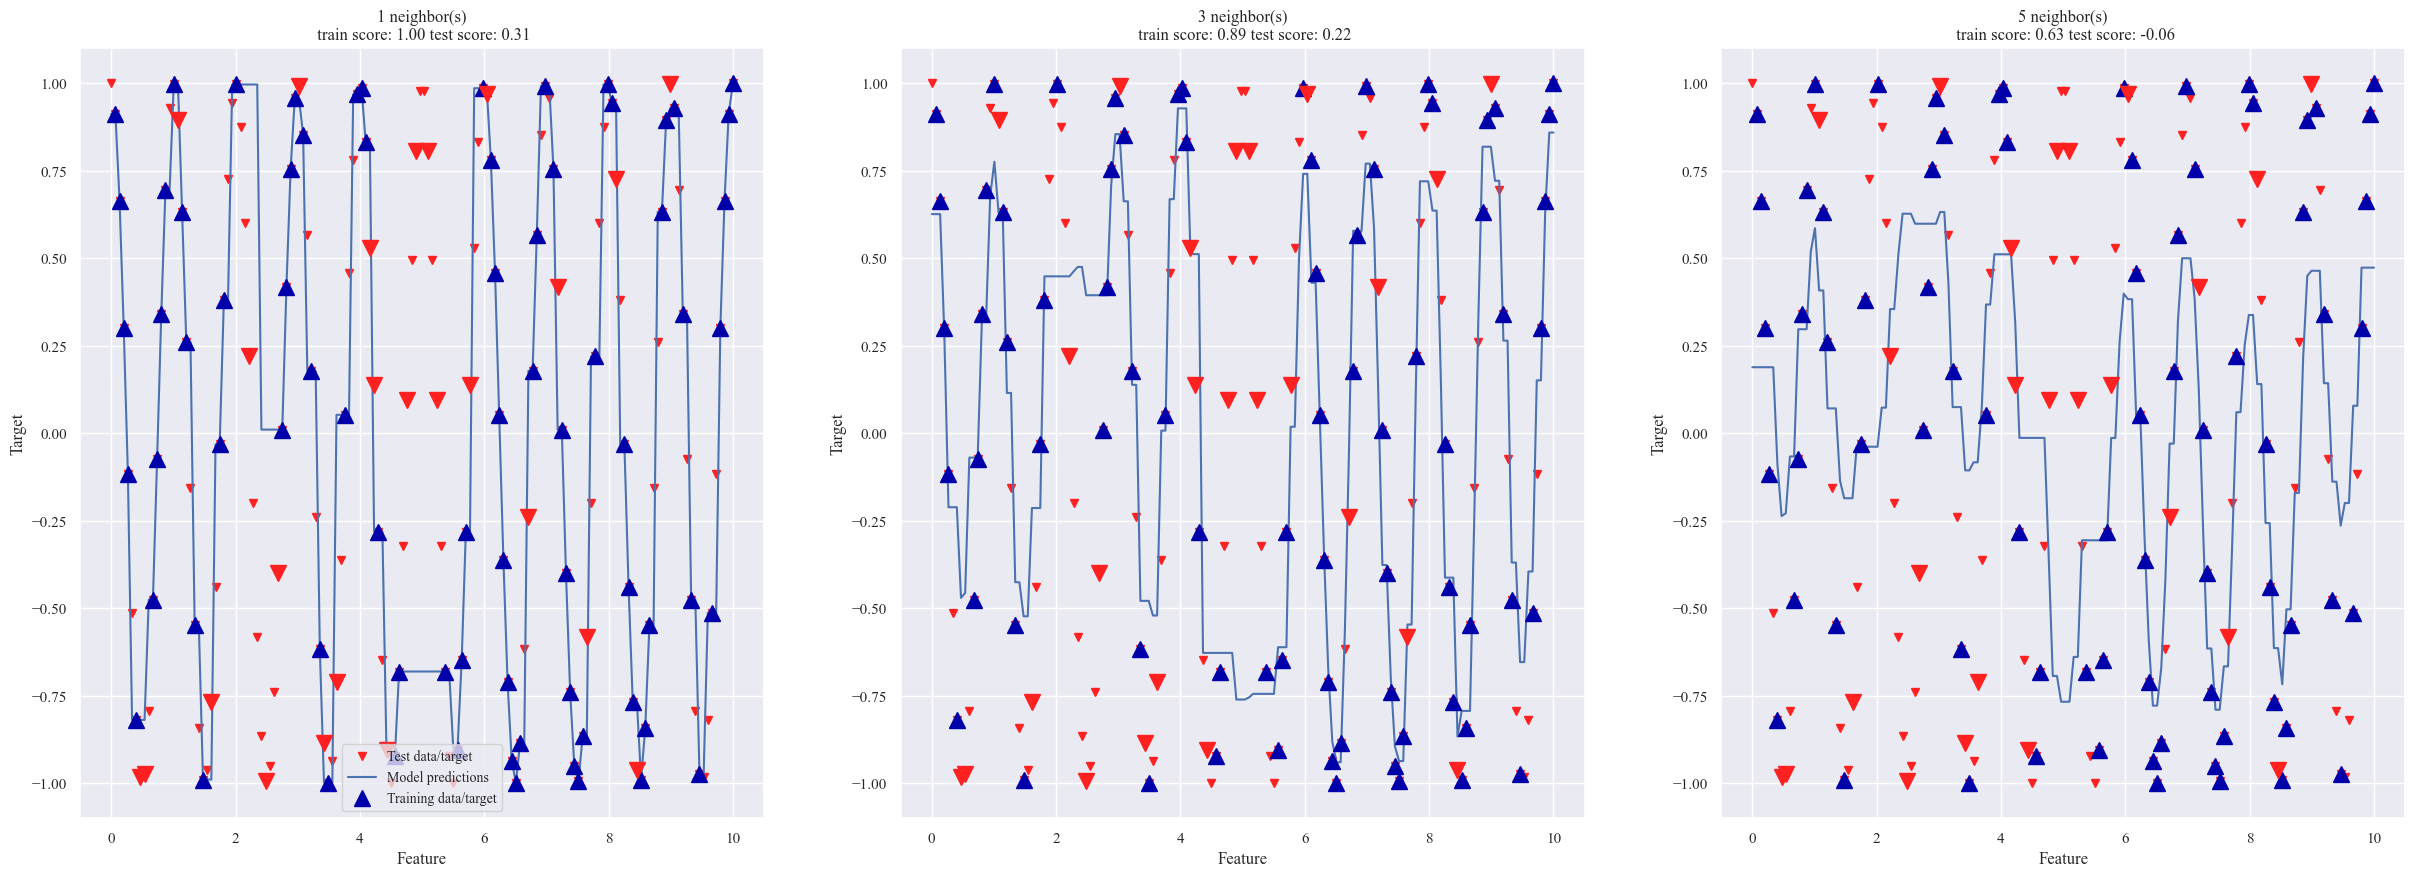

In [7]:
X_train, X_test, y_train, y_test = tts(XX, y, train_size = 75, test_size = 25, random_state=0)

fig, axes = plt.subplots(1, 3, figsize=(30, 10)) 
line = np.linspace(0, 10, len(XX)).reshape(len(XX), -1)

params = {'legend.fontsize': 10, 'legend.handlelength': 2}

plot.rcParams.update(params)
for n_neighbors, ax in zip([1, 3, 5, 10, 100], axes):
    # make predictions using 1, 3, 5, 10, or 100 neighbors
    
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(X, y, 'v',c=mglearn.cm2(1))
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train,'^',c=mglearn.cm2(0),markersize=11)
    ax.plot(X_test, y_test,'v',c=mglearn.cm2(1),markersize=11)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train, y_train),
                                                                         reg.score(X_test,y_test)))    
    ax.set_xlabel("Feature")  
    ax.set_ylabel("Target")         
axes[0].legend(["Test data/target","Model predictions","Training data/target"],loc='lower center')
pass

## Analysis

As the graph shows, having a neighborhood of 1 lead to a situation where the training accuracy is significantly higher than the testing accuracy, which is the possibility of the model significantly overfitting because the model only predicts visible data but not invisible data. On the other graph, having a neighbor of 5 also indicates a poor fit due to some reason the model fails to capture the underlying patterns in the data, leading to poor prediction of the training dataset and scores standard. Neighbor 3 is optimal because provides a good balance between training and testing accuracy while minimizing overfitting compared to 1 and 5 neighbors.

In [5]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [6]:
tanan_training = pd.DataFrame()
tanan_test = pd.DataFrame()

for seedN in range(1,100,1):
    X_train, X_test, y_train, y_test = tts(XX, y, train_size = 0.75, test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    neighbors_settings = range(1, 101) # try n_neighbors from 1 to 100

    for n_neighbors in neighbors_settings:   
        reg = KNeighborsRegressor(n_neighbors=n_neighbors) #build the model 
        reg.fit(X_train, y_train) #clf = KNeighborsRegressor(n_neighbors=n_neighbors)    
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy  
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy    
    tanan_training[seedN]=training_accuracy
    tanan_test[seedN] = test_accuracy
pass

AttributeError: 'KNeighborsRegressor' object has no attribute 'to'

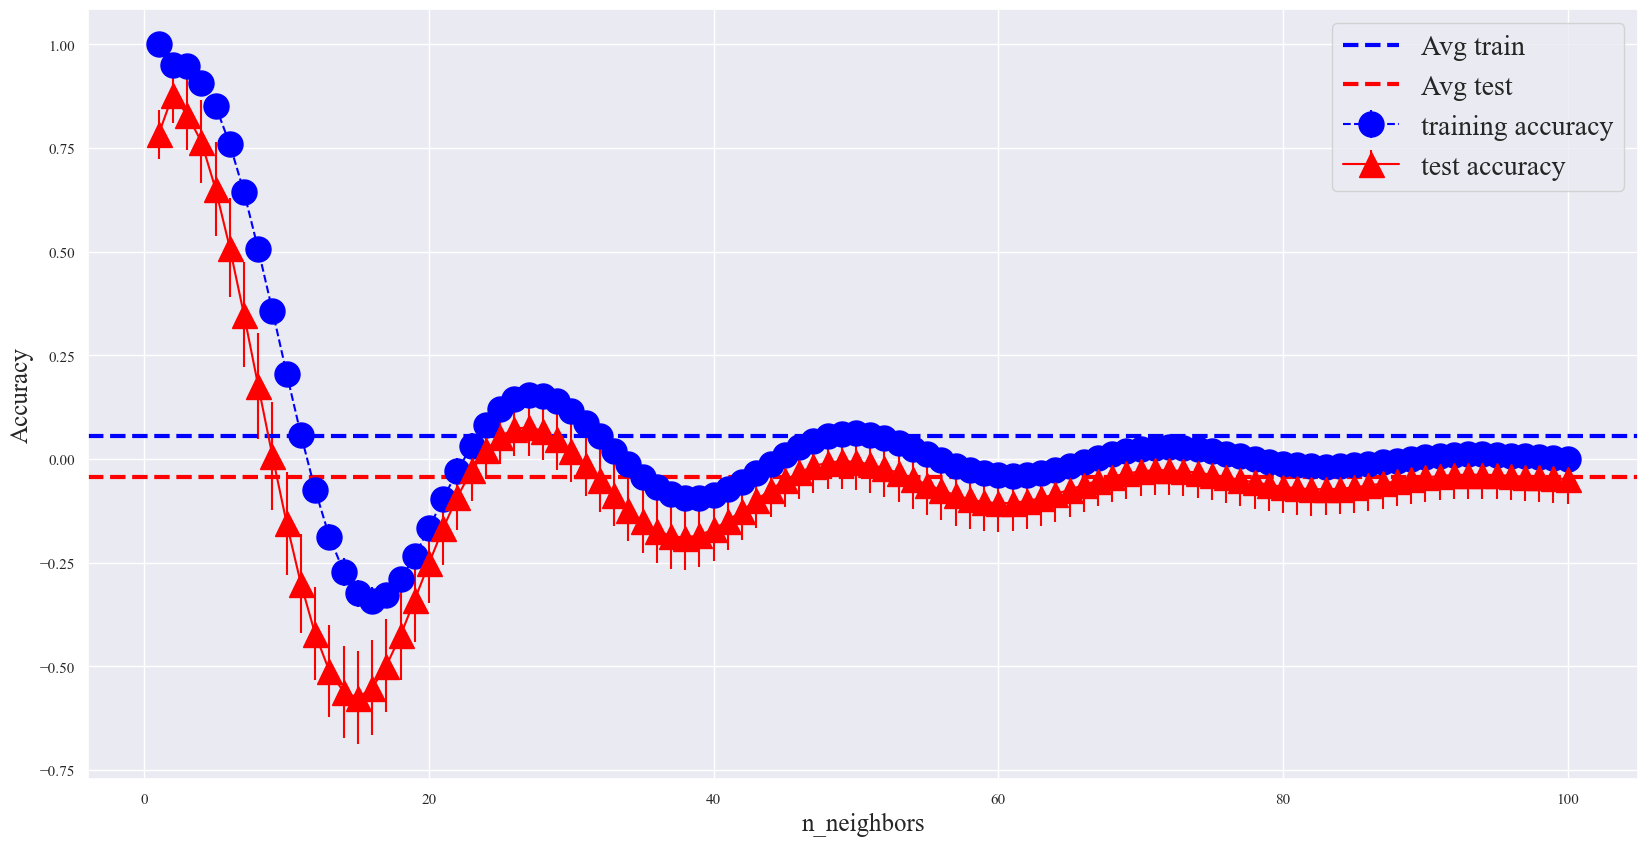

Average training test accuracy: 0.06
Average test accuracy: -0.04


In [36]:
fig = plt.figure(figsize=(20, 10))
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, tanan_training.mean(axis=1),
             yerr=tanan_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.errorbar(neighbors_settings, tanan_test.mean(axis=1),
             yerr=tanan_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=18)

plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)

#add horizontal line at mean value of y
plt.axhline(y=np.nanmean(tanan_training), color='blue', linestyle='--', linewidth=3, label='Avg train')
plt.axhline(y=np.nanmean(tanan_test), color='red', linestyle='--', linewidth=3, label='Avg test')
plt.legend()
plt.show()

avg_train = y=np.nanmean(tanan_training)
avg_test = y=np.nanmean(tanan_test)
print(f'Average training test accuracy: {avg_train:.2f}')
print(f'Average test accuracy: {avg_test:.2f}')

By plotting this graph, The optimal or just right number of neighbors would be 2 due to the nearby distance between the train and the test and having an accuracy of around 0.80~80%.